# Modelo de Regresión Lineal

A continuación, veremos un ejemplo en el que analizamos data utilizando un modelo de regresión lineal.

## Importar Librerías

Basic libraries:

In [26]:
import pandas as pd
import numpy as np

Data visualization libraries:

In [2]:
# import seaborn as sns
import matplotlib.pyplot as plt

To plot the graph embedded in the notebook we use the following line of code:

In [3]:
%matplotlib inline

Scikit-learn libraries for linear regression:

In [41]:
from sklearn import datasets as ds
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

## Carga de Datos

Para este ejercicio haremos uso del siguiente dataset. El conjunto de datos de Vivienda de Boston contiene información sobre varias casas en Boston a través de diferentes parámetros.

Hay 506 muestras y 13 variables de características en este conjunto de datos. El objetivo es predecir el valor de los precios de la casa utilizando las características dadas. Aquí estamos importando este conjunto de datos desde el propio scikit-learn.

Cargamos los datos:

In [5]:
boston = ds.load_boston()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

Con el siguiente comando podemos ver una descripción de los contenidos en la variable boston.

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Lo convertimos a un data frame:

In [9]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Selección de Features

Dado que es realmente difícil de visualizar con las múltiples características, primero predeciremos el precio de la vivienda con solo una variable:

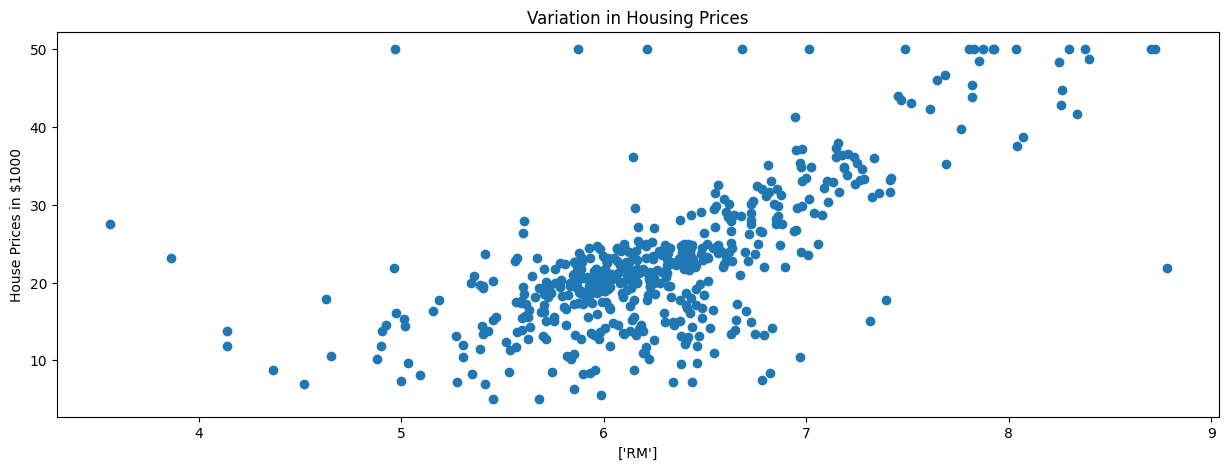

In [37]:
# Creamos la figura donde se encontrará la gráfica y seleccionamos su tamaño de la gráfica:
plt.figure(figsize=(15, 5))

# Elegimos la X (features) y Y (target) que serán graficadas:
features = ['RM'] # X
target = df_boston['PRICE'] # Y

x = df_boston[features]
y = target

# Creamos y modificamos la gráfica de X y Y:
plt.subplot(1, len(features), 1)
plt.scatter(x, y, marker='o')
plt.title('Variation in Housing Prices')
plt.xlabel(features)
plt.ylabel('House Prices in $1000')

# Finalmente utilizamos esta línea para mostrar la gráfica creada y omitir otro tipo de información innecesaria:
plt.show()

Después, creamos arreglos utilizando las features y el target (X y Y).

En este caso, como podemos observar, los arreglos x_rooms y y_price son arreglos unidimensionales.

In [38]:
x_rooms = df_boston.RM # df_boston['RM']
y_price = df_boston.PRICE # df_boston['PRICE']

print(x_rooms.shape, y_price.shape)

(506,) (506,)


Por lo tanto, los convertiremos en arreglos con su determinado número de filas y 1 columna; haciendo uso del método de numpy .reshape(-1, 1)

Cabe mencionar que al dar los parámetros (-1,1) a reshape, le estamos indicando que necesitamos un arreglo de 1 columna y las correspondientes filas; haciendo uso del -1.

In [39]:
x_rooms = np.array(x_rooms).reshape(-1, 1)
y_price = np.array(y_price).reshape(-1, 1)

print(x_rooms.shape, y_price.shape)

(506, 1) (506, 1)


Ahora los arreglos x_rooms y y_price son arreglos de 506 filas con 1 columna, lo cual nos facilita el desarrollo de modelo de regresión lineal.

## Datos de Entrenamiento y Prueba

Como necesitamos probar nuestro modelo, dividimos los datos en conjuntos de entrenamiento y prueba. Entrenamos el modelo con el 80% de las muestras y probamos con el 20% restante. Hacemos esto para evaluar el rendimiento del modelo en datos no vistos.

Para dividir los datos, usamos la función train_test_split proporcionada por la biblioteca scikit-learn. Finalmente imprimimos las formas de nuestro conjunto de entrenamiento y prueba para verificar si la división se ha producido correctamente.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_rooms, y_price, test_size=0.2, random_state=2) # 80% entrenamiento y 20% para testing

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(404, 1) (102, 1)
(404, 1) (102, 1)


Como lo vimos anteriormente, los datos de training son arreglos que contienen el 80% de los datos de x_rooms y y_price, mientras que los de testing son el 20%

## Entrenamiento y Prueba de Modelo

Usaremos LinearRegression de scikit-learn para entrenar nuestro modelo, tanto en el entrenamiento como en los conjuntos de prueba.

Además de comprobar el rendimiento del modelo en el conjunto de datos del tren.

Con la siguiente linea de códgo creamos el modelo de regresión lineal, sin embargo, sigue sin estar entrenado el modelo:

In [42]:
lr = LinearRegression() # Modelo no entrenado

Para entrenar el modelo lr usamos el método fit:

In [43]:
lr.fit(x_train, y_train) # Entrenamiento del modelo

LinearRegression()

Una vez ya entrenado el modelo lr, probaremos su precisión haciendo uso de los datos de testing.

Es importante recalcar que el rango de r^2 (r2) nos indicara la precisión del modelo; este opera en un rango (0,1), donde 1 es perfecto.

In [52]:
y_prediction = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
r2 = round(lr.score(x_test, y_test), 2)

print("The model performance for test set")
print("------------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for test set
------------------------------------------
Root Mean Squared Error: 5.536929907868703
R^2: 0.63


Debido a que r^2 es muy alejada de 1, el modelo no tiene una buena precisión. Esto se debe a la mínima cantidad de features elegidas para el modelo.

Finalmente graficamos los resultados:

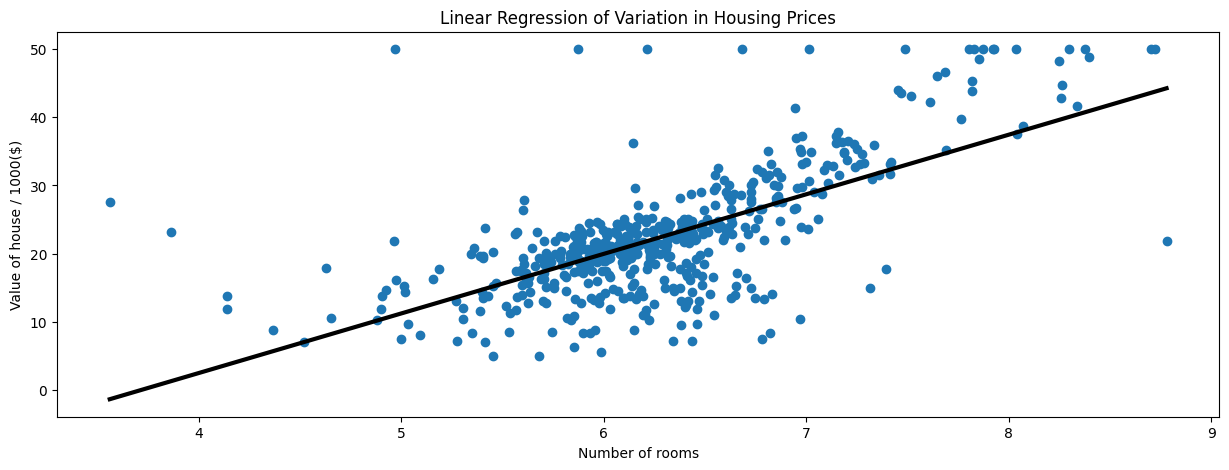

In [75]:
prediction_space = np.linspace(min(x_rooms), max(x_rooms)).reshape(-1,1)
plt.figure(figsize=(15, 5))
plt.scatter(x_rooms, y_price)
plt.plot(prediction_space, lr.predict(prediction_space), color = 'black', linewidth = 3)
plt.xlabel('Number of rooms')
plt.ylabel('Value of house / 1000($)')
plt.title('Linear Regression of Variation in Housing Prices')
plt.show()